In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_L = pd.read_csv('TrainData\Plant1_Location3_No_Nan.csv');
df_L_24 = pd.read_csv('TestData\Test_P1_L3_24.csv');
df_L_48 = pd.read_csv('TestData\Test_P1_L3_48.csv');

# Training

In [23]:
y_train = df_L.loc[:,'cond'];
df_L.drop('cond', axis='columns', inplace=True);
df_L.drop('Year', axis='columns', inplace=True);
df_L.drop('Month', axis='columns', inplace=True);
df_L.drop('Day', axis='columns', inplace=True);
df_L.drop('Hour', axis='columns', inplace=True);
df_L.drop('Minute', axis='columns', inplace=True);
x_train = df_L;

In [24]:
df_L.head()

,tem_in,hum_in,tem_coil,tem_out,hum_out
0,13.0,32.0,10.0,9.0,42.0
1,11.0,42.0,7.0,7.0,59.0
2,10.0,44.0,7.0,6.0,56.0
3,10.0,41.0,8.0,18.0,30.0
4,14.0,30.0,9.0,18.0,20.0


In [25]:
print(y_train.size)

58604


In [26]:
class proba_eec(EasyEnsembleClassifier):
    def predict(self, X):
        return EasyEnsembleClassifier.predict_proba(self, X)

y_pred = cross_val_predict(proba_eec(), x_train, y_train, cv=5);

In [27]:
y_pred = np.delete(y_pred,(0), axis=1)
print(y_pred.size)

58604


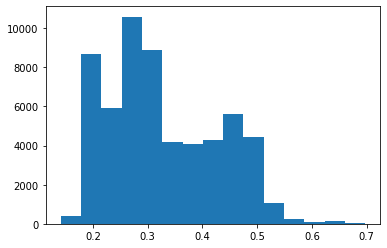

<Figure size 432x288 with 0 Axes>

In [28]:
plt.hist(y_pred, bins=15)
plt.show()
plt.clf()

In [29]:
logical = np.zeros((y_pred.size, 1), dtype=bool)
for i in range(y_pred.size):
    if(y_pred[i] > 0.35):
        if(y_pred[i] < 0.5):
            logical[i] = 1;

In [30]:
print(logical.size)
index = np.argwhere(logical ==1)
index = np.delete(index, (1), axis= 1)
print(index.shape)

58604
(19140, 1)


In [31]:
df_L = pd.read_csv('TrainData\Plant1_Location3_No_Nan.csv');
for i in range(index.size):
    num = index[i] - i;
    df_L.drop(df_L.index[num], inplace=True)

In [32]:
y_train = df_L.loc[:,'cond'];
df_L.drop('cond', axis='columns', inplace=True);
df_L.drop('Year', axis='columns', inplace=True);
df_L.drop('Month', axis='columns', inplace=True);
df_L.drop('Day', axis='columns', inplace=True);
df_L.drop('Hour', axis='columns', inplace=True);
df_L.drop('Minute', axis='columns', inplace=True);
x_train = df_L;

In [33]:
df_L.head()

,tem_in,hum_in,tem_coil,tem_out,hum_out
0,13.0,32.0,10.0,9.0,42.0
1,11.0,42.0,7.0,7.0,59.0
2,10.0,44.0,7.0,6.0,56.0
3,10.0,41.0,8.0,18.0,30.0
4,14.0,30.0,9.0,18.0,20.0


In [34]:
eec = EasyEnsembleClassifier()
eec.fit(x_train,y_train.ravel());

# Predict

In [35]:
df_L_24.drop('Year', axis='columns', inplace=True);
df_L_24.drop('Month', axis='columns', inplace=True);
df_L_24.drop('Day', axis='columns', inplace=True);
df_L_24.drop('Hour', axis='columns', inplace=True);
df_L_24.drop('Minute', axis='columns', inplace=True);

df_L_48.drop('Year', axis='columns', inplace=True);
df_L_48.drop('Month', axis='columns', inplace=True);
df_L_48.drop('Day', axis='columns', inplace=True);
df_L_48.drop('Hour', axis='columns', inplace=True);
df_L_48.drop('Minute', axis='columns', inplace=True);

In [36]:
P_24= eec.predict(df_L_24);
PP_24 = eec.predict_proba(df_L_24);
P_48= eec.predict(df_L_48);
PP_48 = eec.predict_proba(df_L_48);
PP_24 = np.delete(PP_24,(0), axis=1)
PP_48 = np.delete(PP_48,(0), axis=1)

# Save

In [37]:
df_T = pd.read_csv('TestData\Time_P1_L3_Data.csv');

df_T.drop('tem_in', axis='columns', inplace=True);
df_T.drop('tem_coil', axis='columns', inplace=True);
df_T.drop('tem_out', axis='columns', inplace=True);
df_T.drop('hum_in', axis='columns', inplace=True);
df_T.drop('hum_out', axis='columns', inplace=True);

In [38]:
df_T.head()

,Year,Month,Day,Hour,Minute
0,2019,4,3,12,30
1,2019,4,5,2,30
2,2019,4,5,8,0
3,2019,4,5,15,30
4,2019,4,6,6,30


In [39]:
df_T['24H'] = P_24;
df_T['24H_P'] = PP_24;
df_T['48H'] = P_48;
df_T['48H_P'] = PP_48;

In [40]:
df_T.to_csv('Result_P1_L3.csv',index = False) 